In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [39]:
df = pd.read_csv("resultsWithoutHeader.csv", header=None, names=["incarnation", "test_type", "average", "simulation_time"])
df["incarnation"] = df["incarnation"].map(lambda x: x.capitalize())

# Filter the dataset to consider only the biggest simulation time
max_simulation_time = df["simulation_time"].max()
df_filtered = df[df["simulation_time"] == max_simulation_time]

# Group by test type
grouped_df = df_filtered.groupby("test_type")

# Loop through each test type
for test_type, group_data in grouped_df:
    # Group by incarnation and calculate the average duration
    avg_duration = group_data.groupby("incarnation")["average"].mean()
    
    # Calculate the ratio of average durations
    ratio_collektive_protelis = []
    ratio_collektive_scafi = avg_duration["Collektive"] / avg_duration["Scafi"] 
    
    print(f"For test type '{test_type}':")

    if(avg_duration["Collektive"] > avg_duration["Protelis"]):
        ratio_collektive_protelis = (avg_duration["Collektive"] / avg_duration["Protelis"])
        print(f"- Collektive is {ratio_collektive_protelis:.2f}% slower than Protelis:")
    else:
        ratio_collektive_protelis = (avg_duration["Protelis"] / avg_duration["Collektive"]) 
        print(f"- Collektive is {ratio_collektive_protelis:.2f}% faster than Protelis:")
    
    if(avg_duration["Collektive"] > avg_duration["Scafi"]):
        print(f"- Collektive is {ratio_collektive_scafi:.2f}% slower than ScaFi:")
    else:
        print(f"- Collektive is {ratio_collektive_scafi:.2f}% faster than ScaFi:")
    

For test type 'branching':
- Collektive is 1.63% slower than Protelis:
- Collektive is 0.31% faster than ScaFi:
For test type 'channelWithObstacles':
- Collektive is 3.32% faster than Protelis:
- Collektive is 0.53% faster than ScaFi:
For test type 'fieldEvolution':
- Collektive is 1.85% slower than Protelis:
- Collektive is 0.39% faster than ScaFi:
For test type 'gradient':
- Collektive is 1.03% slower than Protelis:
- Collektive is 0.54% faster than ScaFi:
For test type 'neighborCounter':
- Collektive is 2.01% slower than Protelis:
- Collektive is 0.62% faster than ScaFi:


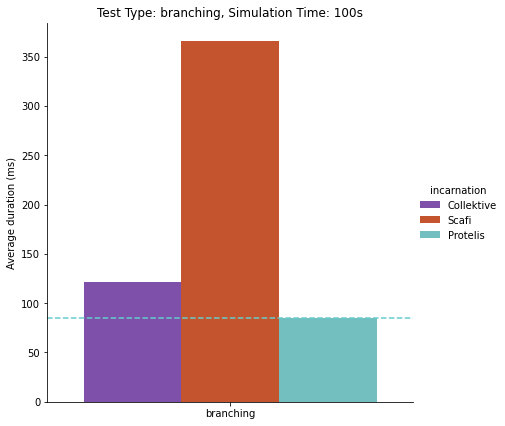

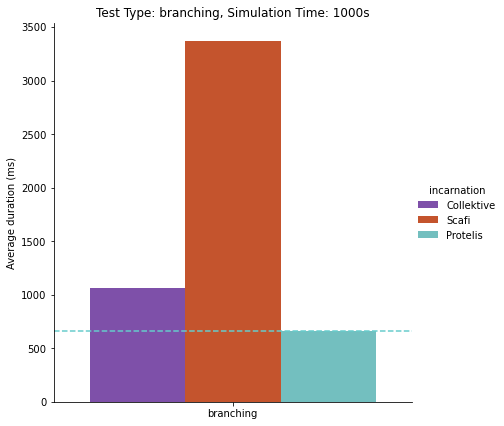

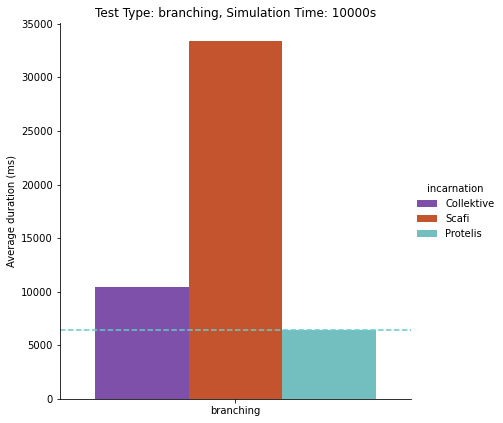

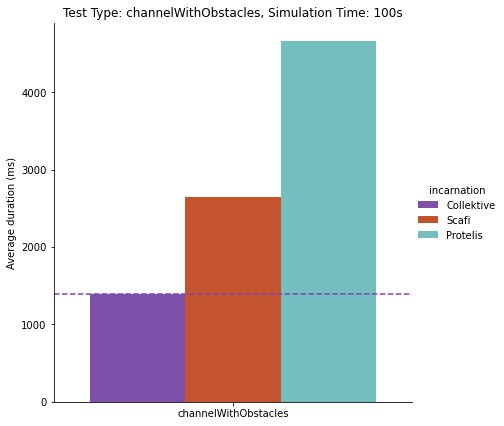

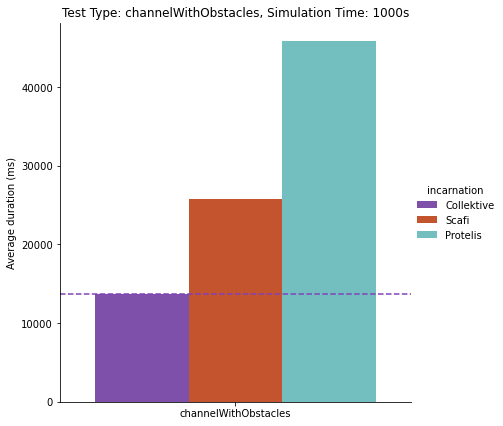

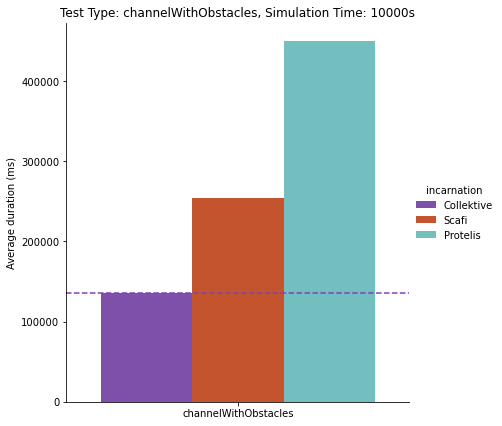

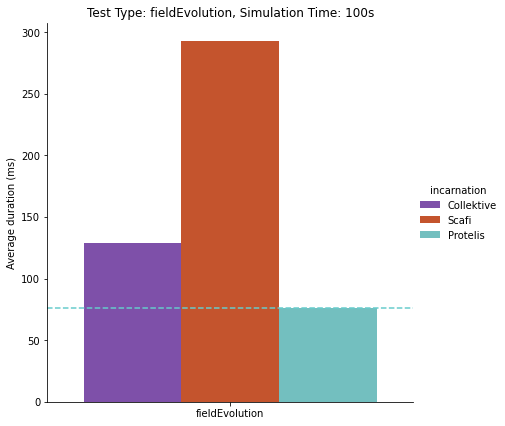

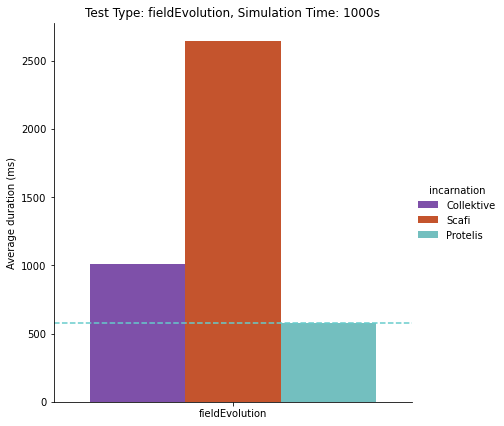

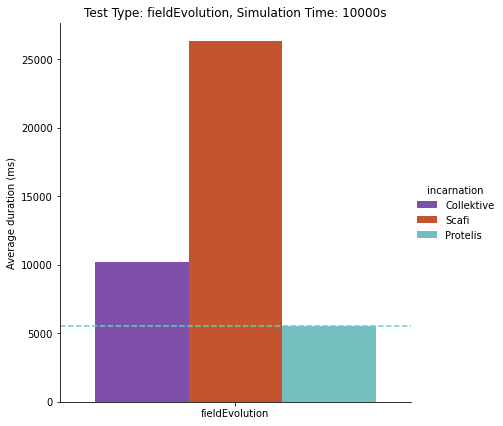

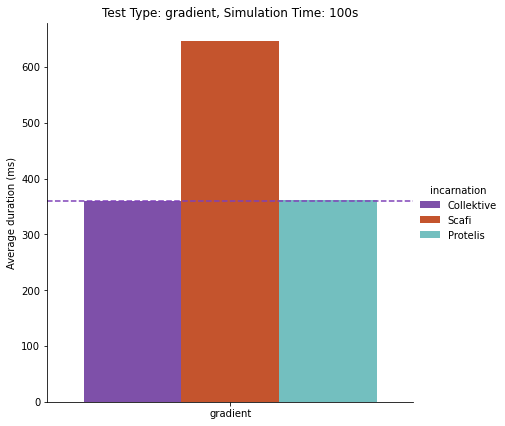

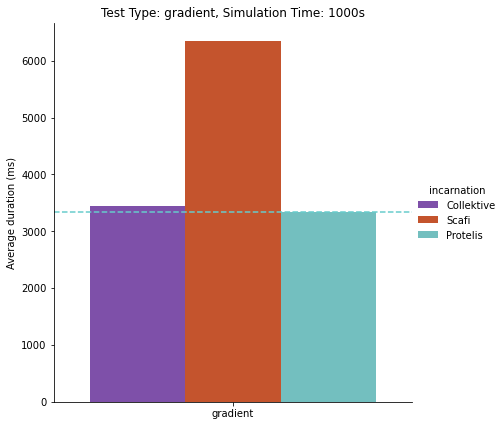

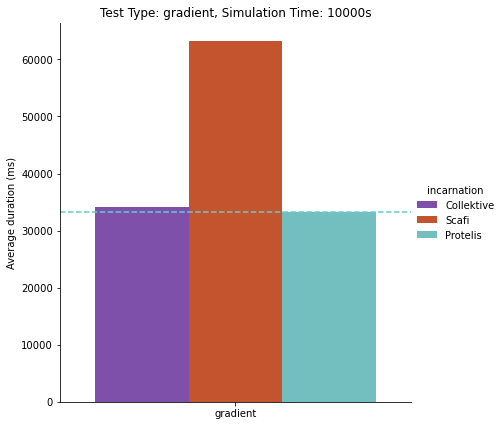

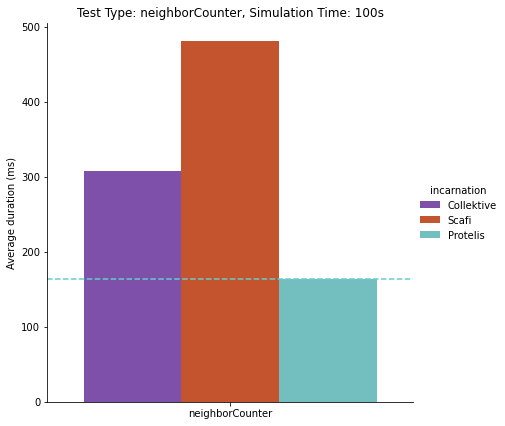

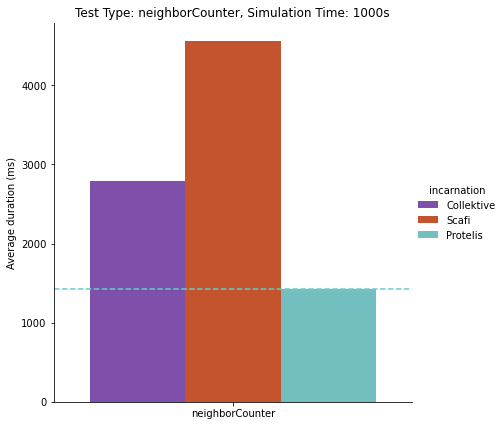

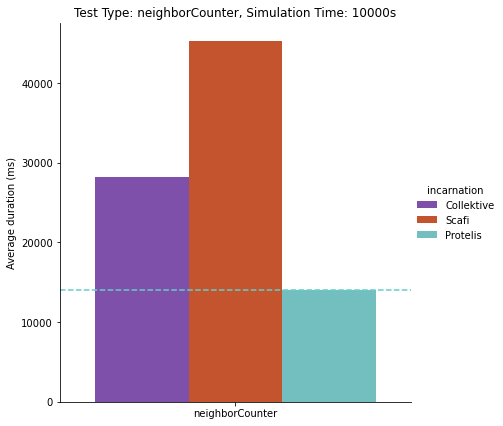

In [3]:
# Load the dataset
df = pd.read_csv("resultsWithoutHeader.csv", header=None, names=["incarnation", "test_type", "average", "simulation_time"])
df["incarnation"] = df["incarnation"].map(lambda x: x.capitalize())
grouped_df = df.groupby(["test_type", df["simulation_time"].astype(int)])

# Define custom palette
custom_palette = {
    "Collektive": "#7F41B8",  # Purple color for collektive
    "Scafi": "#DD4814",        # Scala programming language color for scafi
    "Protelis": "#66CCCC"      # Light green color for protelis
}

output_folder = "plots"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through each group and create the plot
for group_name, group_data in grouped_df:
    g = sns.catplot(
        data=group_data, kind="bar",
        x="test_type", y="average", hue="incarnation",
        palette=custom_palette, height=6
    )
    
    # Find the lowest average value and its corresponding incarnation
    lowest_test_type = group_data.loc[group_data["average"].idxmin()]["incarnation"]
    lowest_avg_value = group_data["average"].min()
    
    # Add a horizontal line indicating the lowest average value
    g.ax.axhline(y=lowest_avg_value, color=custom_palette[lowest_test_type], linestyle="--", 
                label=f"{lowest_test_type} lowest")
    
    # Set plot title and labels
    g.set(title=f"Test Type: {group_name[0]}, Simulation Time: {group_name[1]}s",
          xlabel="", ylabel="Average duration (ms)")
    
    # Save the plot as a PDF file
    filename = f"{group_name[0]}_{group_name[1]}.pdf"
    filepath = os.path.join(output_folder, filename)
    plt.savefig(filepath, format="pdf")
    
plt.show()

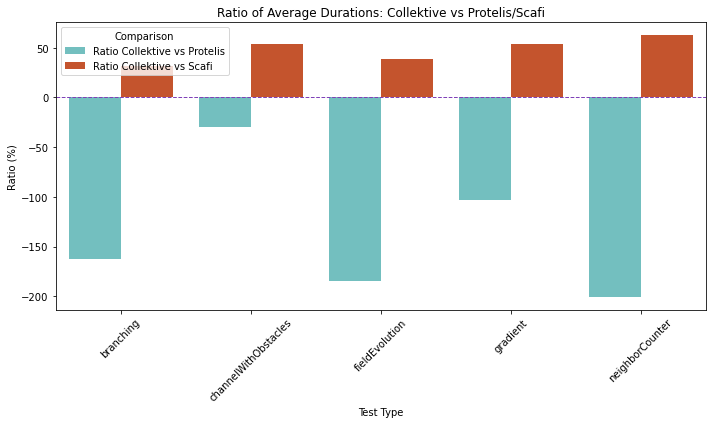

In [15]:
# Filter the dataset to consider only the biggest simulation time
max_simulation_time = df["simulation_time"].max()
df_filtered = df[df["simulation_time"] == max_simulation_time]

# Group by test type
grouped_df = df_filtered.groupby("test_type")

# Create lists to store the data
test_types = []
ratio_protelis = []
ratio_scafi = []

# Loop through each test type
for test_type, group_data in grouped_df:
    # Group by incarnation and calculate the average duration
    avg_duration = group_data.groupby("incarnation")["average"].mean()
    
    # Calculate the ratio of average durations
    ratio_collektive_protelis = avg_duration["Collektive"] / avg_duration["Protelis"] * 100
    ratio_collektive_scafi = avg_duration["Collektive"] / avg_duration["Scafi"] * 100
    
    # Append data to lists
    test_types.append(test_type)
    ratio_protelis.append(ratio_collektive_protelis)
    ratio_scafi.append(ratio_collektive_scafi)

# Create a DataFrame from the lists
data = pd.DataFrame({
    "Test Type": test_types,
    "Ratio Collektive vs Protelis": ratio_protelis,
    "Ratio Collektive vs Scafi": ratio_scafi
})

# Melt the DataFrame to have a single "value" column for ratios
data_melted = data.melt(id_vars="Test Type", var_name="Comparison", value_name="Ratio")

# Normalize the ratios so that Collektive is the reference point
data_melted.loc[data_melted["Comparison"] == "Ratio Collektive vs Protelis", "Ratio"] *= -1

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x="Test Type", y="Ratio", hue="Comparison", palette=[custom_palette["Protelis"], custom_palette["Scafi"]])
plt.title("Ratio of Average Durations: Collektive vs Protelis/Scafi")
plt.axhline(y=0, color=custom_palette["Collektive"], linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.xlabel("Test Type")
plt.ylabel("Ratio (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


branching
c > p
10477.0
6442.0
61.48706690846616
channelWithObstacles
c < p
135767.0
450310.0
30.14967466856166
fieldEvolution
c > p
10178.0
5514.0
54.175673020239735
gradient
c > p
34117.0
33217.0
97.36201893484187
neighborCounter
c > p
28272.0
14097.0
49.862054329371816


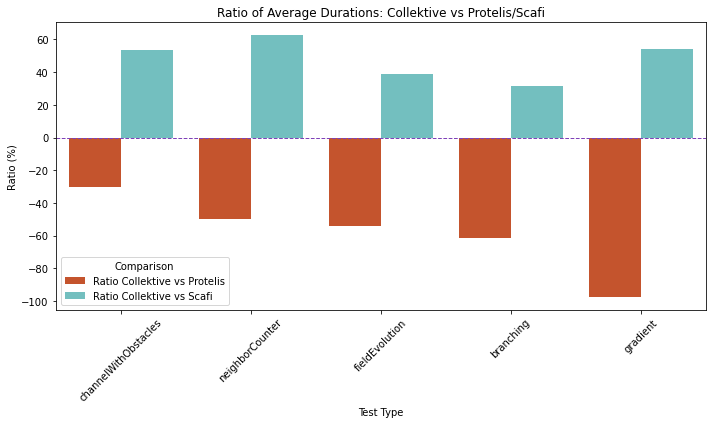

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("resultsWithoutHeader.csv", header=None, names=["incarnation", "test_type", "average", "simulation_time"])
df["incarnation"] = df["incarnation"].map(lambda x: x.capitalize())

# Filter the dataset to consider only the biggest simulation time
max_simulation_time = df["simulation_time"].max()
df_filtered = df[df["simulation_time"] == max_simulation_time]

# Group by test type
grouped_df = df_filtered.groupby("test_type")

# Create lists to store the data
test_types = []
ratio_protelis = []
ratio_scafi = []

# Loop through each test type
for test_type, group_data in grouped_df:
    # Group by incarnation and calculate the average duration
    avg_duration = group_data.groupby("incarnation")["average"].mean()
    
    print(test_type)
    # Calculate the ratio of average durations
    ratio_collektive_protelis = []
    if(avg_duration["Collektive"] < avg_duration["Protelis"]):
        ratio_collektive_protelis = avg_duration["Collektive"] / avg_duration["Protelis"] * 100
        print("c < p")
    else:
        ratio_collektive_protelis = avg_duration["Protelis"] / avg_duration["Collektive"] * 100
        print("c > p")
    print(avg_duration["Collektive"])
    print(avg_duration["Protelis"])
    print(ratio_collektive_protelis)
    ratio_collektive_scafi = avg_duration["Collektive"] / avg_duration["Scafi"] * 100
    
    # Append data to lists
    test_types.append(test_type)
    ratio_protelis.append(ratio_collektive_protelis)
    ratio_scafi.append(ratio_collektive_scafi)

# Create a DataFrame from the lists
data = pd.DataFrame({
    "Test Type": test_types,
    "Ratio Collektive vs Protelis": ratio_protelis,
    "Ratio Collektive vs Scafi": ratio_scafi
})

# Melt the DataFrame to have a single "value" column for ratios
data_melted = data.melt(id_vars="Test Type", var_name="Comparison", value_name="Ratio")

# Normalize the ratios so that Collektive is the reference point
data_melted.loc[data_melted["Comparison"] == "Ratio Collektive vs Protelis", "Ratio"] *= -1

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x="Test Type", y="Ratio", hue="Comparison", palette=["#DD4814", "#66CCCC"], order=data_melted.groupby("Test Type")["Ratio"].mean().sort_values(ascending=False).index)
plt.axhline(y=0, color="#7F41B8", linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.title("Ratio of Average Durations: Collektive vs Protelis/Scafi")
plt.xlabel("Test Type")
plt.ylabel("Ratio (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
